# Coronavirus en La Plata

Esta notebook está pensada para mostrar el desarrollo del coronavirus en la ciudad, y hacer un poco de análisis con los datos disponibles. La fuente de los datos es el informe diario que brinda la Municipalidad de La Plata por twitter (https://twitter.com/LaPlataMLP).

Primero veremos como extraer los datos, luego aplicaremos un poco de ingeniería para mejorarlos y terminaremos con un análisis de tendencias mediante gráficos.

Para arrancar, extraeremos los datos de un archivo csv que se llama "DataSet Coronavirus La Plata.csv", este archivo lo voy a dejar en drive (https://drive.google.com/file/d/1qsELlatvjy0Il6gnwzHODBuTTj4UijF9/view?usp=sharing) para quien lo quiera y lo voy a estar actualizando todos los días con los datos que actualice la Municipalidad.

# Indice

* [1 - Imports](#1)
* [2 - Cargamos los datos](#2)
* [3 - Procesamos el dataset](#3)
* [4 - Analizamos el dataset](#4)

# 1 - Imports <a id="1"></a>

Importamos las librerias que vamos a necesitar para poder trabajar

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="darkgrid")

# 2 - Cargamos los datos <a id="2"></a>

In [2]:
# Armamos el DataFrame a partir de nuestro archivo
coronavirus = pd.read_csv('DataSet Coronavirus La Plata.csv',index_col='Fecha')

In [3]:
coronavirus.head(2)

,Casos_Confirmados,Activos,Altas,Casos_Sospechosos,Casos_Descartados,Muertes
Fecha,,,,,,
27/03/2020,3,3,0,29,30,0
28/03/2020,3,3,0,32,35,0


# 3 - Procesamos el dataset  <a id="3"></a>

In [4]:
# Hacemos un cambio de nombre a las columnas
coronavirus.columns = ["Confirmados","Activos","Altas","En_Estudio","Descartados","Muertes"]

Una vez extraidos los datos, podemos ver que lo que se refiere a Confirmados, Altas y Descartados son datos acumulados y no nos da información sobre la cantidad de casos que hubo en el día. Respecto a los casos en estudio diario, tampoco nos da información sobre los casos en estudio del día pero en este caso no son "datos acumulados" en forma estricta.

Por lo tanto, va a ser una buena idea para nuestros análisis contar con la información diaria para estos tópicos. Entonces los vamos a agregar como nuevas columnas en nuestro DataSet.

In [5]:
# Obtenemos los datos de casos confirmados por día
Confirmados_Dia=[]
for i in range(len(coronavirus)):
    if i == 0:
        Confirmados_Dia.append(coronavirus['Confirmados'][i])
    else:
        Dia=coronavirus['Confirmados'][i]-coronavirus['Confirmados'][i - 1]
        Confirmados_Dia.append(Dia)
coronavirus['Confirmados_Dia']=Confirmados_Dia

# Obtenemos los datos de casos dados de alta por día
Altas_Dia=[]
for i in range(len(coronavirus)):
    if i == 0:
        Altas_Dia.append(coronavirus['Altas'][i])
    else:
        Dia=coronavirus['Altas'][i]-coronavirus['Altas'][i - 1]
        Altas_Dia.append(Dia)
coronavirus['Altas_Dia']=Altas_Dia

# Obtenemos los datos de casos descartados por día
Descartados_Dia=[]
for i in range(len(coronavirus)):
    if i == 0:
        Descartados_Dia.append(0)
    else:
        Dia=coronavirus['Descartados'][i]-coronavirus['Descartados'][i - 1]
        Descartados_Dia.append(Dia)
coronavirus['Descartados_Dia']=Descartados_Dia

# Obtenemos los datos de nuevos casos en estudio por día
Estudio_Dia=[]
for i in range(len(coronavirus)):
    if i == 0:
        Estudio_Dia.append(0)
    else:
        Aux1= coronavirus['Confirmados_Dia'][i] + coronavirus['Descartados_Dia'][i]
        Aux2= coronavirus['En_Estudio'][i - 1] - Aux1
        Dia=coronavirus['En_Estudio'][i]- Aux2
        Estudio_Dia.append(Dia)
coronavirus['En_Estudio_Dia']=Estudio_Dia

In [6]:
coronavirus.head()

,Confirmados,Activos,Altas,En_Estudio,Descartados,Muertes,Confirmados_Dia,Altas_Dia,Descartados_Dia,En_Estudio_Dia
Fecha,,,,,,,,,,
27/03/2020,3,3,0,29,30,0,3,0,0,0
28/03/2020,3,3,0,32,35,0,0,0,5,8
29/03/2020,4,4,0,34,35,0,1,0,0,3
30/03/2020,4,4,0,37,37,0,0,0,2,5
31/03/2020,4,4,0,46,38,0,0,0,1,10


# 4 - Analizamos el dataset  <a id="4"></a>

Ahora que tenemos un DataSet mucho más robusto, podemos empezar a hacer algunos análisis. Comencemos por ver la progresión de casos confirmados junto con los activos, las altas y las muertes.

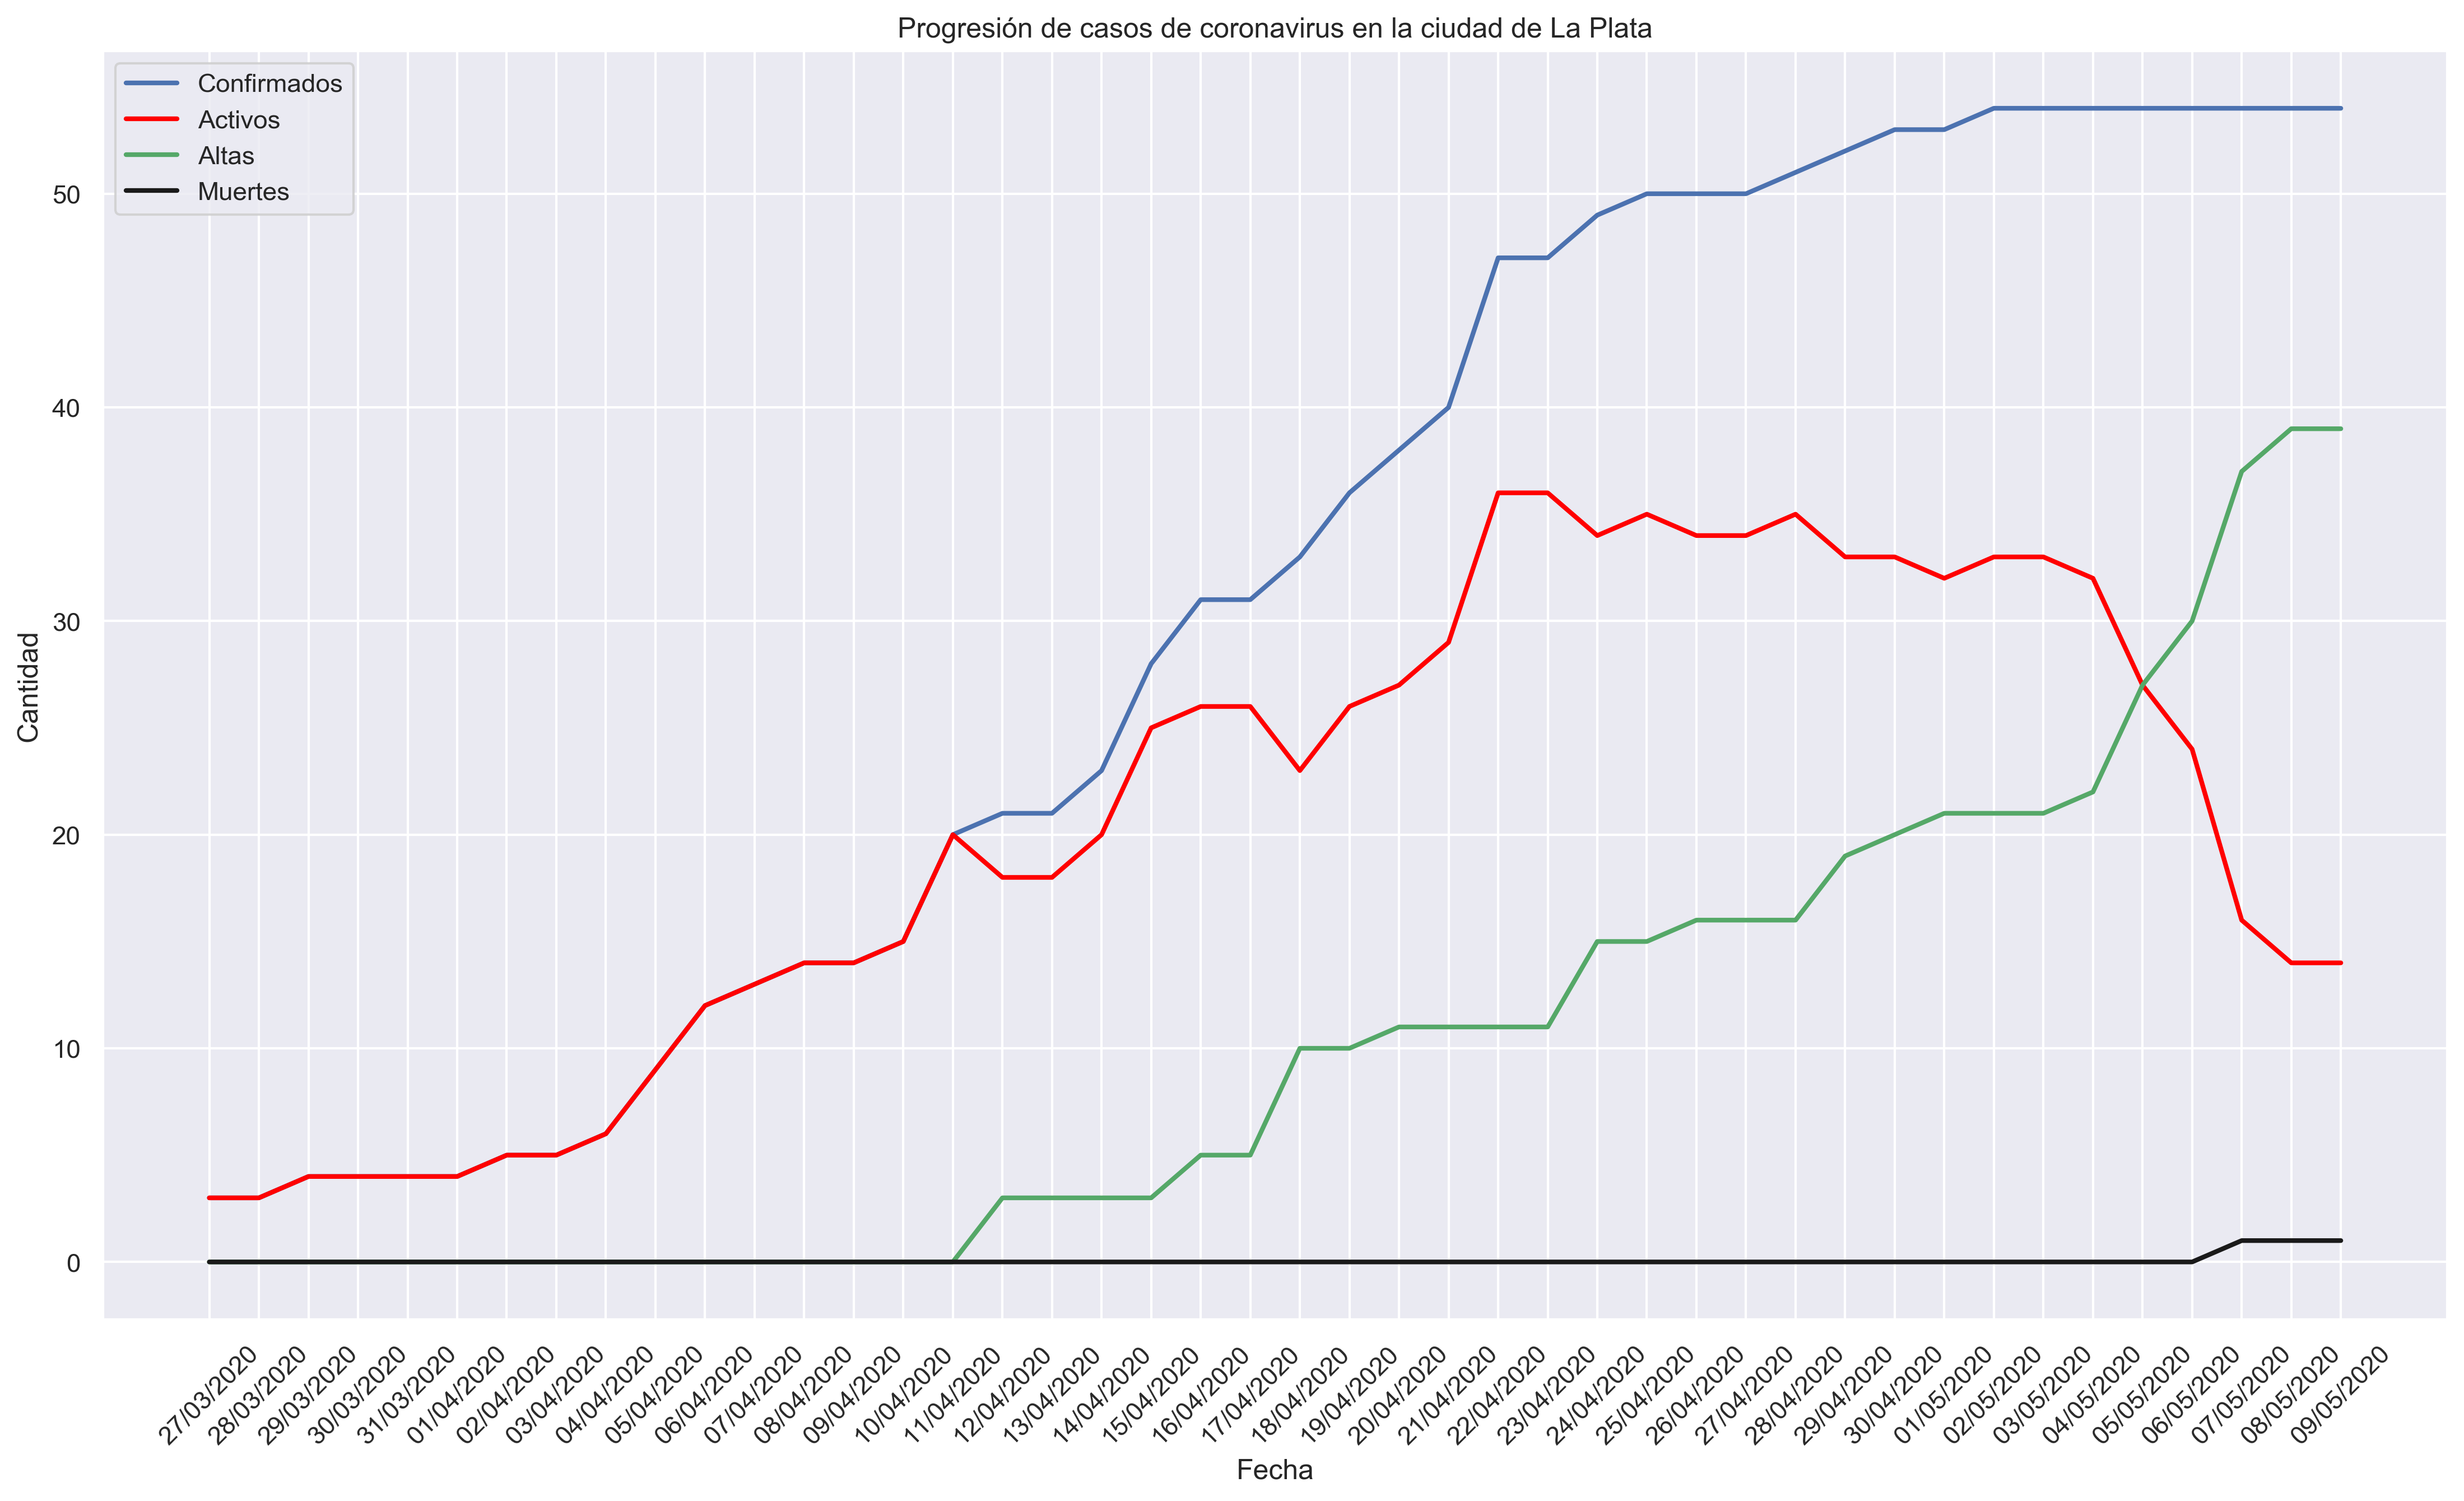

In [7]:
# Armado del gráfico

# Ajustamos el tamaño
plt.figure(dpi=300, figsize = (18,10))

# Agregamos cada linea de información con sus distintos atributos para poder diferenciarlos
plt.plot(coronavirus['Confirmados'], "-", color= 'b', linewidth = 2, label='Confirmados')
plt.plot(coronavirus['Activos'],     "-", color= 'red', linewidth = 2, label='Activos')
plt.plot(coronavirus['Altas'],       "-", color= 'g', linewidth = 2, label='Altas')
plt.plot(coronavirus['Muertes'],     "-", color= 'k', linewidth = 2, label='Muertes')

# Ponemos información sobre los ejes y el titulo para que nuestro gráfico se entienda
plt.xlabel('Fecha')
plt.xticks(rotation = 45)
plt.ylabel('Cantidad')
plt.title("Progresión de casos de coronavirus en la ciudad de La Plata")

# Mostramos el gráfico
plt.legend()
plt.show()

El primer análisis que se puede hacer es que la curva de contagios parece haberse desacelerado con mucha velocidad desde hace unos 10 días, ya que desde el 30 de abril se registró solamente un caso positivo en la ciudad. A su vez, la cantidad de altas a partir de mayo supera en gran cantidad a los casos activos y solamente hay una muerte, lo que da una muestra de que el sistema sanitario de la ciudad esta respondiendo en forma satisfactoria.

Veamos ahora cómo es la relación entre casos descartados y nuevos casos en estudio diarios. Esta relación es clave, ya que nos dará un panorama sobre posible transmisión del virus en la ciudad. Si los casos descartados tienden a ser más que los casos en estudio nos dará la idea que cuál es el nivel de transmisión en la ciudad (aclaración: para estos casos sería ideal tener una geolocalización para saber de qué parte de la ciudad vienen los casos en estudio, pero esa información no está disponible para todo público).

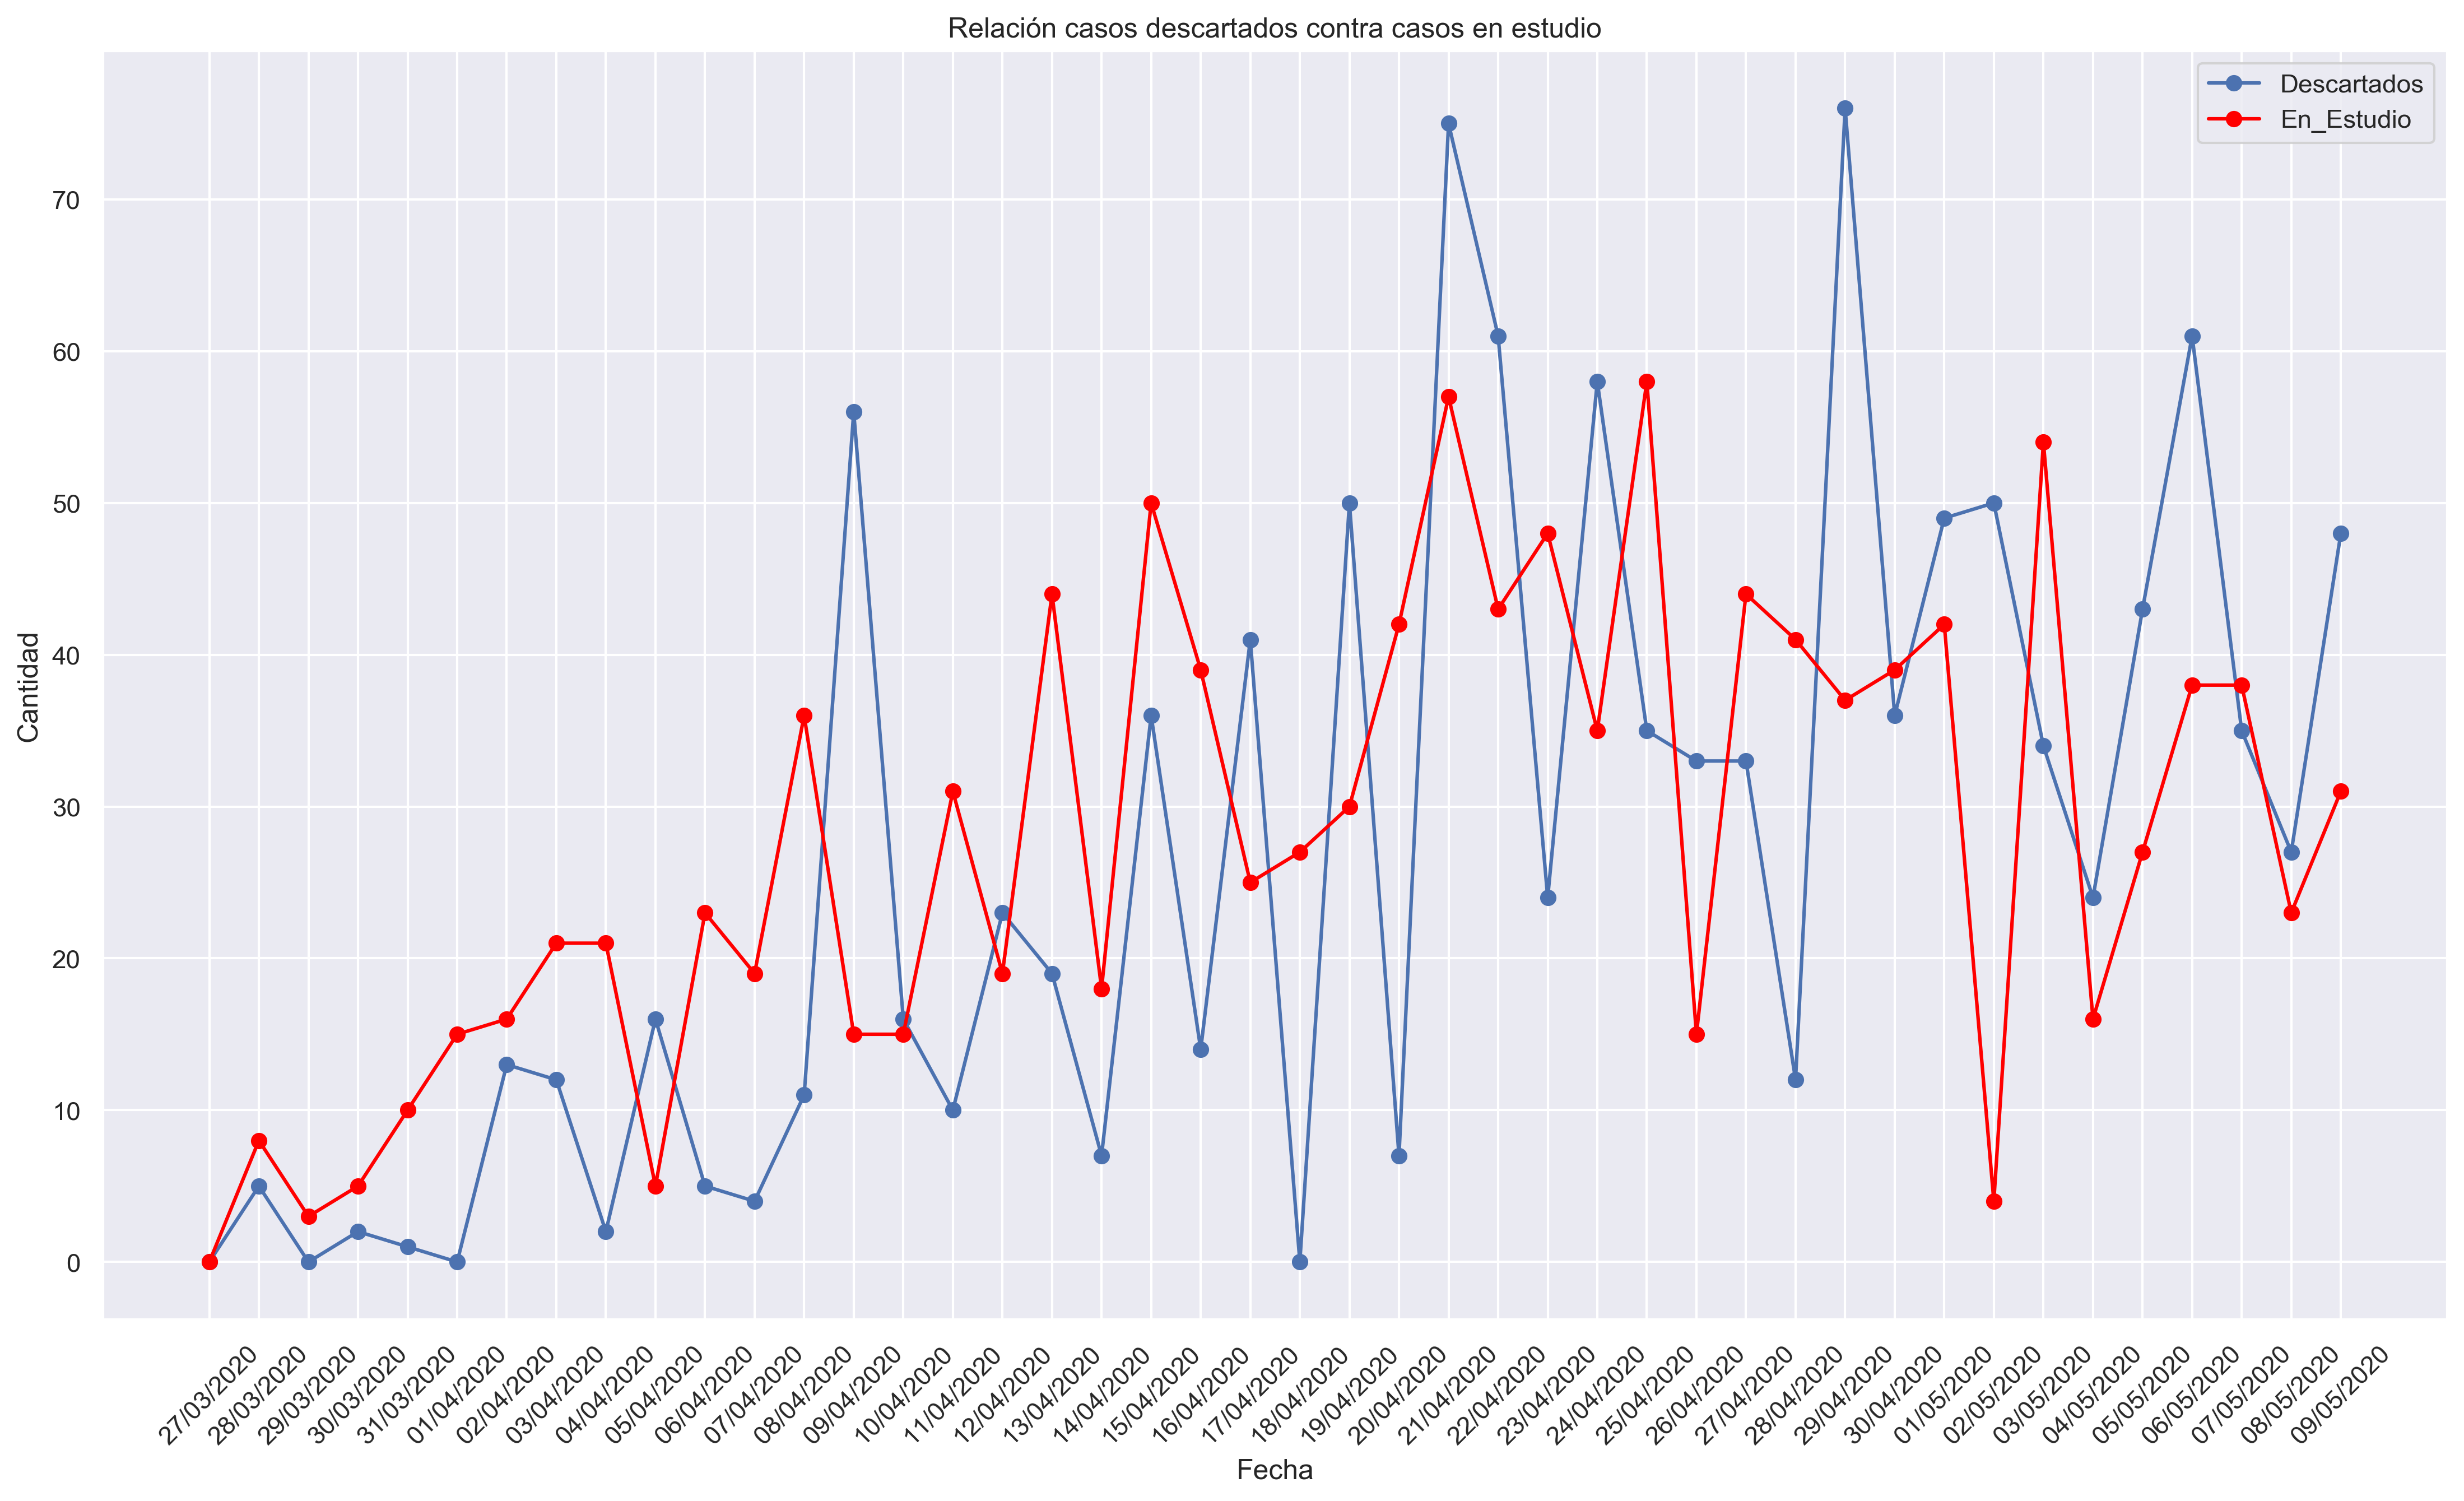

In [8]:
# Armado del gráfico

# Ajustamos el tamaño
plt.figure(dpi=300, figsize = (18,10))

# Agregamos cada linea de información con sus distintos atributos para poder diferenciarlos
plt.plot(coronavirus['Descartados_Dia'], "-o", color= 'b', label='Descartados')
plt.plot(coronavirus['En_Estudio_Dia'],  "-o", color= 'red', label='En_Estudio')

# Ponemos información sobre los ejes y el titulo para que nuestro gráfico se entienda
plt.xlabel('Fecha')
plt.xticks(rotation = 45)
plt.ylabel('Cantidad')
plt.title("Relación casos descartados contra casos en estudio")

#Mostramos el gráfico
plt.legend()
plt.show()

Aquí podemos ver que en los primeros 15/20 días hay una clara superioridad de los casos en estudio a los descartados, que va de la mano con los aumentos de casos en la ciudad en esas fechas. Pero, en la segunda mitad del gráfico, vemos que los casos descartados empiezan a predominar sobre los casos en estudio. Un punto interesante para estudiar son los picos que presentan los casos descartados. Haciendo un análisis rápido, esto puede deberse a una demora en el resultado de los tests, ya que hasta hace muy poco tiempo los lugares autorizados para testear eran muy pocos.